<a href="https://colab.research.google.com/github/ravi260372/Data_Science_Python/blob/main/Feature_Engineering_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reference Dataset**

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving loan.csv to loan.csv
User uploaded file "loan.csv" with length 1069577 bytes


# Variable Types

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [4]:
# create a data frame 
df = pd.read_csv('loan.csv')
df.sample(5).T

,3464,7639,5198,259,9568
customer_id,3464,7639,5198,259,9568
disbursed_amount,24250,9500,6930,19008,3200
interest,19.1296,5.4873,5.7285,12.282,14.64
market,E,A,A,C,C
employment,Statistician,Dentist,Civil Servant,Nurse,Statistician
time_employed,>5 years,>5 years,<=5 years,>5 years,<=5 years
householder,MORTGAGE,MORTGAGE,MORTGAGE,RENT,RENT
income,111000,117030,24696,74340.6,61750
date_issued,2014-10-15,2014-07-23,2011-09-19,2014-08-10,2014-04-01
target,0,0,0,0,0


##Variable Identification

In [11]:
# Tabular view of Data {shape of data, the type of data , the missing values , unique counts , % Missing}
# Creating the Data Dictionary with first column being datatype.
Data_dict = pd.DataFrame(df.dtypes)
# Identifying unique values . For this I've used nunique() which returns unique elements in the object.
Data_dict['UniqueVal'] = df.nunique()
# Identifying the missing values from the dataset.
Data_dict['MissingVal'] = df.isnull().sum()
# Percentage of Missing Values
Data_dict['Percent Missing'] = round(df.isnull().sum()/len(df)*100, 2)
# identifying count of the variable.
Data_dict['Count'] = df.count()
# Renaming the first column using rename()
Data_dict = Data_dict.rename(columns = {0:'DataType'})
print(df.info())
Data_dict

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             10000 non-null  int64  
 1   disbursed_amount        10000 non-null  float64
 2   interest                10000 non-null  float64
 3   market                  10000 non-null  object 
 4   employment              9389 non-null   object 
 5   time_employed           9471 non-null   object 
 6   householder             10000 non-null  object 
 7   income                  10000 non-null  float64
 8   date_issued             10000 non-null  object 
 9   target                  10000 non-null  int64  
 10  loan_purpose            10000 non-null  object 
 11  number_open_accounts    10000 non-null  float64
 12  date_last_payment       10000 non-null  object 
 13  number_credit_lines_12  238 non-null    float64
dtypes: float64(5), int64(2), object(7)
memo

,DataType,UniqueVal,MissingVal,Percent Missing,Count
customer_id,int64,10000,0,0.00,10000
disbursed_amount,float64,2522,0,0.00,10000
interest,float64,1869,0,0.00,10000
market,object,5,0,0.00,10000
employment,object,11,611,6.11,9389
time_employed,object,2,529,5.29,9471
householder,object,3,0,0.00,10000
income,float64,2891,0,0.00,10000
date_issued,object,1642,0,0.00,10000
target,int64,2,0,0.00,10000


In [12]:
# separate dataframes by variable types
df_num = df[['disbursed_amount','interest' , 'income' , 'number_open_accounts' , 'number_credit_lines_12']]
df_cat = df[['market' , 'employment' , 'time_employed' , 'householder' , 'loan_purpose']]
df_date = df[['date_issued' , 'date_last_payment']]
df_tgt = df[['target']]
print(df_num.shape)
print(df_cat.shape)
print(df_date.shape)
print(df_tgt.shape)

(10000, 5)
(10000, 5)
(10000, 2)
(10000, 1)


## Variable Distributions

**Distribution of Target**

In [36]:
# Categorical target
df.target.value_counts()

0    9883
1     117
Name: target, dtype: int64

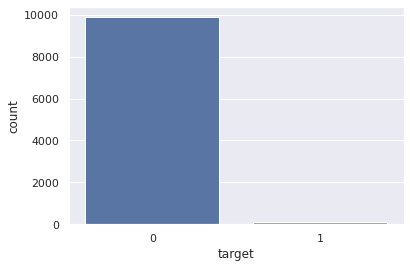

In [38]:
# Visualizing Target Distribution
sns.countplot(data = df , x = 'target');

**Distribution of Numeric Variables**

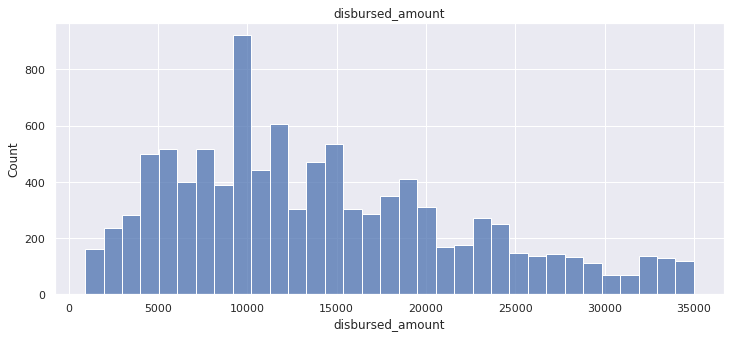

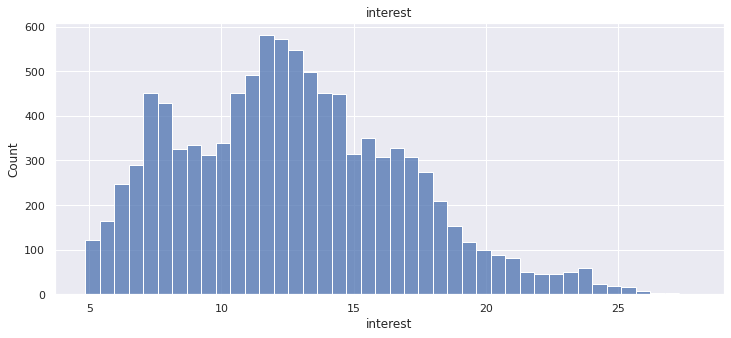

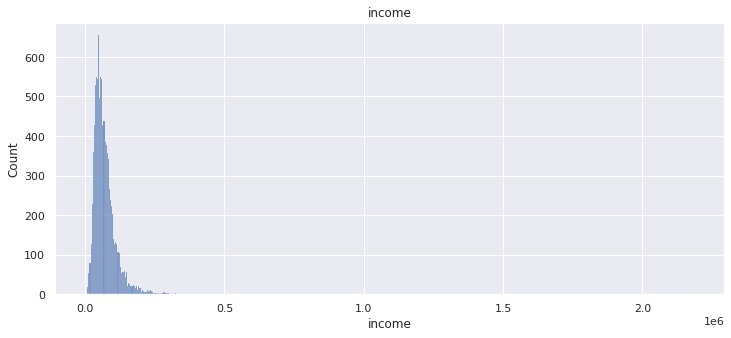

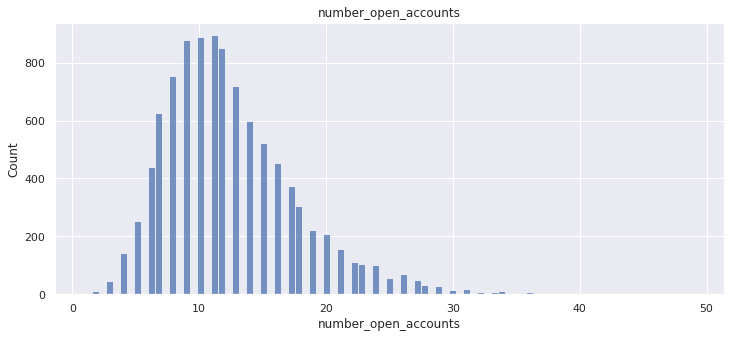

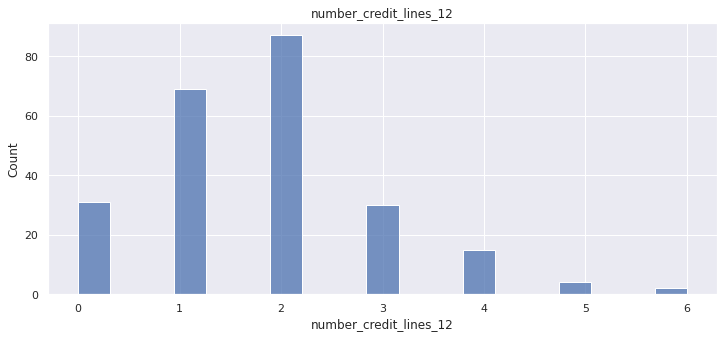

In [32]:
# Histogram
for i in df_num.columns:
    plt.figure(figsize=(12,5))
    plt.title(i)
    sns.histplot(df_num[i]);

**Distribution of Categorical Variables**

In [45]:
# distribution of categories
for i in df_cat.columns:
    print('----------------------------------')
    print(df_cat[i].value_counts())

----------------------------------
B    2846
C    2730
A    1673
D    1577
E    1174
Name: market, dtype: int64
----------------------------------
Civil Servant         884
Nurse                 880
Bus driver            874
Other                 863
Teacher               861
Accountant            852
Statistician          852
Secretary             846
Dentist               844
Taxi driver           825
Software developer    808
Name: employment, dtype: int64
----------------------------------
>5 years     5057
<=5 years    4414
Name: time_employed, dtype: int64
----------------------------------
MORTGAGE    4957
RENT        4055
OWNER        988
Name: householder, dtype: int64
----------------------------------
Debt consolidation    8214
Other                  880
Home improvements      615
Car purchase            90
Health                  87
Holidays                48
Moving home             47
Wedding                 19
Name: loan_purpose, dtype: int64


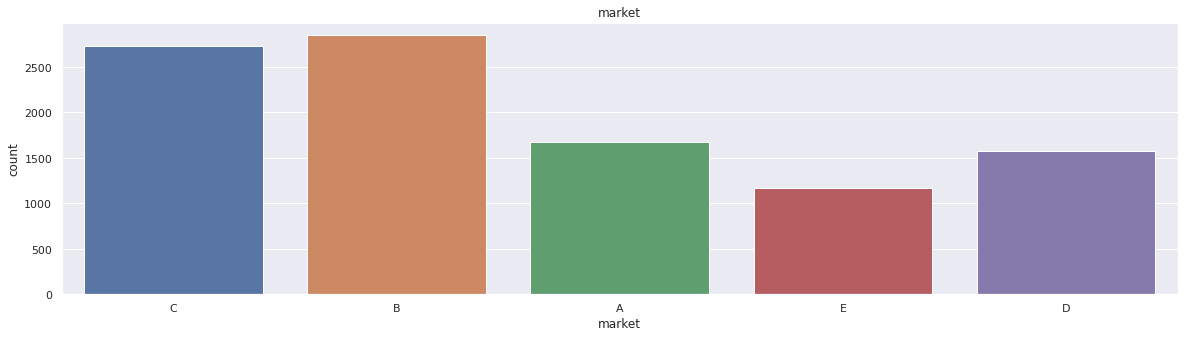

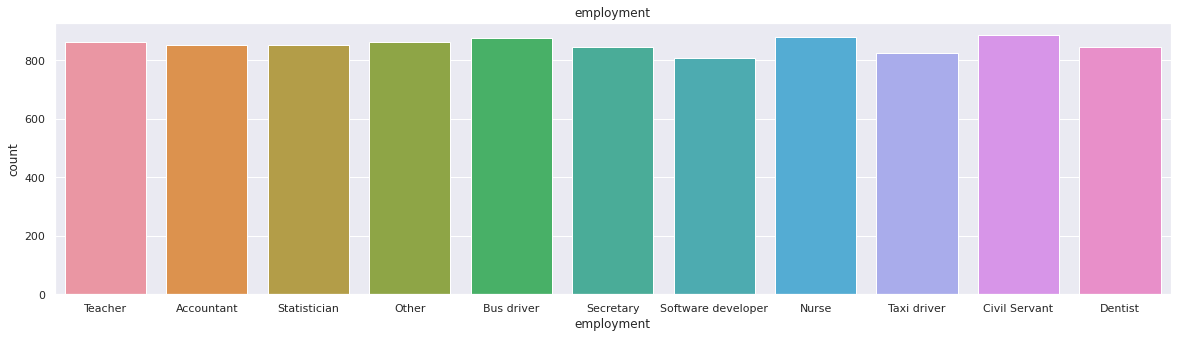

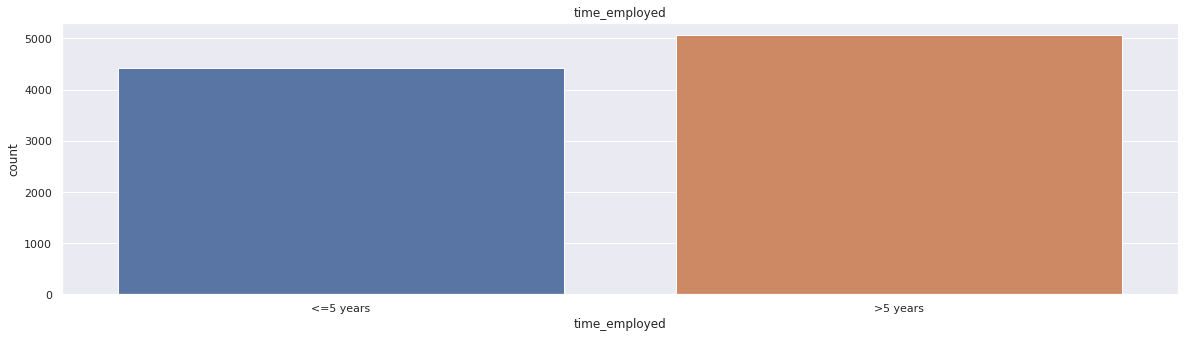

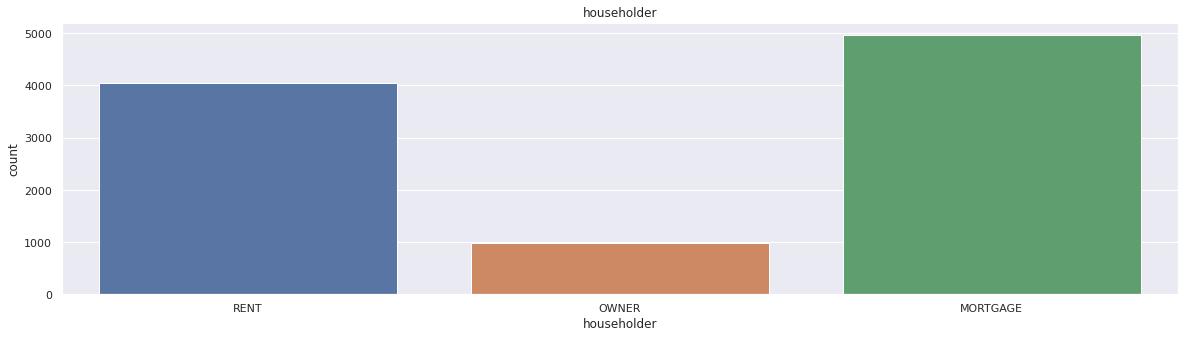

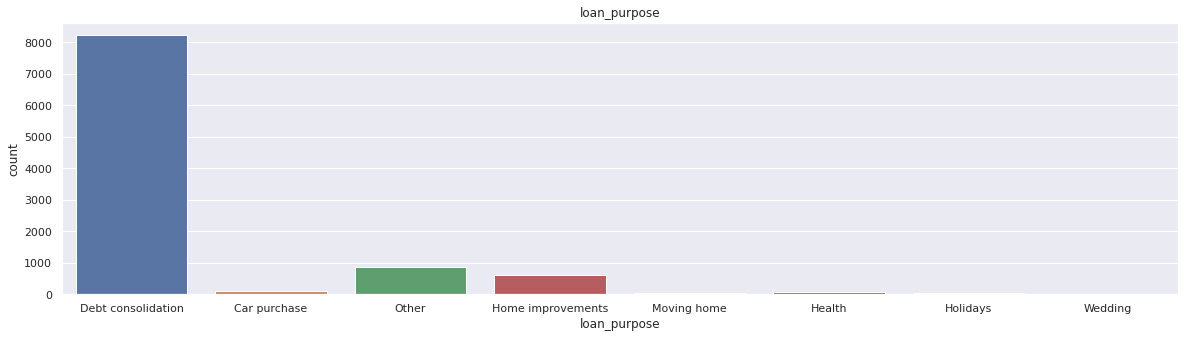

In [40]:
# barplot of categorical variables with diffrent sub-category counts
for i in df_cat.columns:
    plt.figure(figsize=(20,5))
    plt.title(i)
    sns.countplot(df_cat[i]);